<a href="https://colab.research.google.com/github/YLiu95/Loan_default_classification_Llodys_Banking_Group_challenge/blob/main/Lloyds_data_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lloyds data challenge

### import libraries

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
pip install scikeras[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot

## naive data prepration

### import data (18,324 ,31)

In [ ]:
url = 'https://raw.githubusercontent.com/YLiu95/Loan_default_classification_Llodys_Banking_Group_challenge/main/LBG%20Step%20Up%20Data%20Set%20csv.csv'
df = pd.read_csv(url)
df

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,802173,CA,72000.0,3 years,CA. Dept. Of Corrections,MORTGAGE,395.66,12000,debt_consolidation,36 months,...,NaN,NaN,NaN,NaN,16,NaN,0,23,NaN,Fully Paid
1,14518910,TX,97500.0,1 year,Curriculum & Implementation Manager,RENT,966.47,35000,debt_consolidation,60 months,...,2.0,12.0,0.0,1.0,13,87.5,0,24,84227.0,Fully Paid
2,54333324,NY,120000.0,1 year,Senior manager,RENT,806.57,25000,credit_card,36 months,...,2.0,7.0,0.0,1.0,8,100.0,0,16,39124.0,Fully Paid
3,62247022,CA,130000.0,10+ years,Border Patrol Agent,RENT,846.17,25225,debt_consolidation,36 months,...,9.0,3.0,0.0,2.0,8,50.0,0,24,123331.0,Fully Paid
4,71986114,TX,58296.0,10+ years,Account Manager,MORTGAGE,41.79,1200,other,36 months,...,7.0,6.0,0.0,0.0,9,100.0,0,17,51794.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18319,67809746,NY,300000.0,5 years,Director,MORTGAGE,164.22,5000,credit_card,36 months,...,22.0,8.0,0.0,3.0,15,83.3,0,46,319418.0,Fully Paid
18320,66360297,IL,120000.0,9 years,Journalist,MORTGAGE,455.96,14000,debt_consolidation,36 months,...,22.0,9.0,0.0,4.0,22,25.0,0,38,63774.0,Fully Paid
18321,59699673,TX,85000.0,10+ years,Process Operator,MORTGAGE,390.36,11925,credit_card,36 months,...,10.0,14.0,0.0,2.0,17,71.4,0,31,72686.0,Fully Paid
18322,83334760,CA,22000.0,3 years,Instructional Specialist/Applications,RENT,213.89,6000,debt_consolidation,36 months,...,1.0,6.0,0.0,0.0,6,66.7,0,13,5058.0,Fully Paid


### delete categorical (18,324 ,25)

In [ ]:
df_num = df.drop(['addr_state', 'emp_length', 'emp_title',
                  'home_ownership', 'purpose', 'term',], axis=1)
df_num

,id,annual_inc,installment,loan_amnt,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,802173,72000.0,395.66,12000,11.49%,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16,NaN,0,23,NaN,Fully Paid
1,14518910,97500.0,966.47,35000,21.99%,7019.0,NaN,NaN,148.0,170.0,...,2.0,12.0,0.0,1.0,13,87.5,0,24,84227.0,Fully Paid
2,54333324,120000.0,806.57,25000,9.99%,4891.0,NaN,NaN,128.0,147.0,...,2.0,7.0,0.0,1.0,8,100.0,0,16,39124.0,Fully Paid
3,62247022,130000.0,846.17,25225,12.69%,17619.0,NaN,NaN,130.0,172.0,...,9.0,3.0,0.0,2.0,8,50.0,0,24,123331.0,Fully Paid
4,71986114,58296.0,41.79,1200,15.31%,12321.0,1.0,10372.0,167.0,145.0,...,7.0,6.0,0.0,0.0,9,100.0,0,17,51794.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18319,67809746,300000.0,164.22,5000,11.22%,67491.0,0.0,23081.0,127.0,200.0,...,22.0,8.0,0.0,3.0,15,83.3,0,46,319418.0,Fully Paid
18320,66360297,120000.0,455.96,14000,10.64%,15445.0,NaN,NaN,208.0,145.0,...,22.0,9.0,0.0,4.0,22,25.0,0,38,63774.0,Fully Paid
18321,59699673,85000.0,390.36,11925,10.99%,21682.0,NaN,NaN,164.0,365.0,...,10.0,14.0,0.0,2.0,17,71.4,0,31,72686.0,Fully Paid
18322,83334760,22000.0,213.89,6000,16.99%,843.0,3.0,2539.0,99.0,130.0,...,1.0,6.0,0.0,0.0,6,66.7,0,13,5058.0,Fully Paid


### delete missing (4,673 ,25)

In [ ]:
df_final = df_num.dropna()
df_final

,id,annual_inc,installment,loan_amnt,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
10,96352348,81000.0,503.16,16000,8.24%,12658.0,4.0,12203.0,207.0,202.0,...,36.0,11.0,0.0,2.0,18,71.4,0,66,131604.0,Fully Paid
13,113009795,53100.0,162.73,4900,11.99%,3150.0,2.0,1990.0,81.0,66.0,...,16.0,5.0,0.0,6.0,20,100.0,0,22,62991.0,Fully Paid
15,130793408,120000.0,578.62,19000,6.07%,30956.0,3.0,6440.0,162.0,268.0,...,13.0,6.0,0.0,1.0,13,0.0,0,32,70490.0,Fully Paid
17,71955425,60000.0,170.09,5000,13.67%,2837.0,4.0,1040.0,108.0,156.0,...,11.0,5.0,2.0,3.0,7,50.0,0,30,19861.0,Fully Paid
20,115148149,195000.0,389.58,12000,10.42%,4006.0,2.0,10639.0,142.0,384.0,...,7.0,10.0,0.0,2.0,11,0.0,0,30,40057.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18310,113490822,65000.0,148.68,4800,7.21%,14479.0,2.0,15266.0,221.0,204.0,...,11.0,10.0,0.0,2.0,14,20.0,0,28,27803.0,Fully Paid
18312,91329664,101361.0,76.31,2400,8.99%,25945.0,1.0,2489.0,433.0,142.0,...,21.0,2.0,2.0,1.0,8,100.0,0,30,207559.0,Fully Paid
18315,104351405,149500.0,615.11,18000,13.99%,14409.0,2.0,8108.0,162.0,338.0,...,18.0,17.0,0.0,3.0,22,71.4,0,44,195123.0,Fully Paid
18317,125556767,24000.0,246.17,7000,16.02%,10599.0,2.0,2812.0,74.0,103.0,...,4.0,7.0,0.0,0.0,10,50.0,0,14,27973.0,Fully Paid


### delete id (4,673 ,24)

In [ ]:
df_final = df_final.drop(['id'], axis=1)
df_final

,annual_inc,installment,loan_amnt,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
10,81000.0,503.16,16000,8.24%,12658.0,4.0,12203.0,207.0,202.0,31.0,...,36.0,11.0,0.0,2.0,18,71.4,0,66,131604.0,Fully Paid
13,53100.0,162.73,4900,11.99%,3150.0,2.0,1990.0,81.0,66.0,10.0,...,16.0,5.0,0.0,6.0,20,100.0,0,22,62991.0,Fully Paid
15,120000.0,578.62,19000,6.07%,30956.0,3.0,6440.0,162.0,268.0,58.0,...,13.0,6.0,0.0,1.0,13,0.0,0,32,70490.0,Fully Paid
17,60000.0,170.09,5000,13.67%,2837.0,4.0,1040.0,108.0,156.0,1.0,...,11.0,5.0,2.0,3.0,7,50.0,0,30,19861.0,Fully Paid
20,195000.0,389.58,12000,10.42%,4006.0,2.0,10639.0,142.0,384.0,2.0,...,7.0,10.0,0.0,2.0,11,0.0,0,30,40057.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18310,65000.0,148.68,4800,7.21%,14479.0,2.0,15266.0,221.0,204.0,31.0,...,11.0,10.0,0.0,2.0,14,20.0,0,28,27803.0,Fully Paid
18312,101361.0,76.31,2400,8.99%,25945.0,1.0,2489.0,433.0,142.0,32.0,...,21.0,2.0,2.0,1.0,8,100.0,0,30,207559.0,Fully Paid
18315,149500.0,615.11,18000,13.99%,14409.0,2.0,8108.0,162.0,338.0,7.0,...,18.0,17.0,0.0,3.0,22,71.4,0,44,195123.0,Fully Paid
18317,24000.0,246.17,7000,16.02%,10599.0,2.0,2812.0,74.0,103.0,25.0,...,4.0,7.0,0.0,0.0,10,50.0,0,14,27973.0,Fully Paid


### convert to float (4,673 ,24)

In [ ]:
df_final.dtypes

annual_inc                float64
installment               float64
loan_amnt                   int64
int_rate                   object
avg_cur_bal               float64
inq_last_12m              float64
max_bal_bc                float64
mo_sin_old_il_acct        float64
mo_sin_old_rev_tl_op      float64
mo_sin_rcnt_rev_tl_op     float64
mo_sin_rcnt_tl            float64
mort_acc                  float64
mths_since_last_delinq    float64
num_bc_tl                 float64
num_il_tl                 float64
num_op_rev_tl             float64
num_tl_90g_dpd_24m        float64
num_tl_op_past_12m        float64
open_acc                    int64
percent_bc_gt_75          float64
pub_rec_bankruptcies        int64
total_acc                   int64
total_bal_ex_mort         float64
loan_status                object
dtype: object

In [ ]:
df_final['int_rate'] = df_final['int_rate'].map(lambda x: x.rstrip('%'))
df_final['int_rate'] = df_final['int_rate'].astype(float)
df_final.dtypes

annual_inc                float64
installment               float64
loan_amnt                   int64
int_rate                  float64
avg_cur_bal               float64
inq_last_12m              float64
max_bal_bc                float64
mo_sin_old_il_acct        float64
mo_sin_old_rev_tl_op      float64
mo_sin_rcnt_rev_tl_op     float64
mo_sin_rcnt_tl            float64
mort_acc                  float64
mths_since_last_delinq    float64
num_bc_tl                 float64
num_il_tl                 float64
num_op_rev_tl             float64
num_tl_90g_dpd_24m        float64
num_tl_op_past_12m        float64
open_acc                    int64
percent_bc_gt_75          float64
pub_rec_bankruptcies        int64
total_acc                   int64
total_bal_ex_mort         float64
loan_status                object
dtype: object

In [ ]:
df_final

,annual_inc,installment,loan_amnt,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
10,81000.0,503.16,16000,8.24,12658.0,4.0,12203.0,207.0,202.0,31.0,...,36.0,11.0,0.0,2.0,18,71.4,0,66,131604.0,Fully Paid
13,53100.0,162.73,4900,11.99,3150.0,2.0,1990.0,81.0,66.0,10.0,...,16.0,5.0,0.0,6.0,20,100.0,0,22,62991.0,Fully Paid
15,120000.0,578.62,19000,6.07,30956.0,3.0,6440.0,162.0,268.0,58.0,...,13.0,6.0,0.0,1.0,13,0.0,0,32,70490.0,Fully Paid
17,60000.0,170.09,5000,13.67,2837.0,4.0,1040.0,108.0,156.0,1.0,...,11.0,5.0,2.0,3.0,7,50.0,0,30,19861.0,Fully Paid
20,195000.0,389.58,12000,10.42,4006.0,2.0,10639.0,142.0,384.0,2.0,...,7.0,10.0,0.0,2.0,11,0.0,0,30,40057.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18310,65000.0,148.68,4800,7.21,14479.0,2.0,15266.0,221.0,204.0,31.0,...,11.0,10.0,0.0,2.0,14,20.0,0,28,27803.0,Fully Paid
18312,101361.0,76.31,2400,8.99,25945.0,1.0,2489.0,433.0,142.0,32.0,...,21.0,2.0,2.0,1.0,8,100.0,0,30,207559.0,Fully Paid
18315,149500.0,615.11,18000,13.99,14409.0,2.0,8108.0,162.0,338.0,7.0,...,18.0,17.0,0.0,3.0,22,71.4,0,44,195123.0,Fully Paid
18317,24000.0,246.17,7000,16.02,10599.0,2.0,2812.0,74.0,103.0,25.0,...,4.0,7.0,0.0,0.0,10,50.0,0,14,27973.0,Fully Paid


### create input (4673 ,23) and labels

In [ ]:
dataset = df_final.values
dataset

array([[81000.0, 503.16, 16000, ..., 66, 131604.0, 'Fully Paid'],
       [53100.0, 162.73, 4900, ..., 22, 62991.0, 'Fully Paid'],
       [120000.0, 578.62, 19000, ..., 32, 70490.0, 'Fully Paid'],
       ...,
       [149500.0, 615.11, 18000, ..., 44, 195123.0, 'Fully Paid'],
       [24000.0, 246.17, 7000, ..., 14, 27973.0, 'Fully Paid'],
       [22000.0, 213.89, 6000, ..., 13, 5058.0, 'Fully Paid']],
      dtype=object)

In [ ]:
# split into input (X) and output (Y) variables
X = dataset[:,0:23].astype(float)
X

array([[8.10000e+04, 5.03160e+02, 1.60000e+04, ..., 0.00000e+00,
        6.60000e+01, 1.31604e+05],
       [5.31000e+04, 1.62730e+02, 4.90000e+03, ..., 0.00000e+00,
        2.20000e+01, 6.29910e+04],
       [1.20000e+05, 5.78620e+02, 1.90000e+04, ..., 0.00000e+00,
        3.20000e+01, 7.04900e+04],
       ...,
       [1.49500e+05, 6.15110e+02, 1.80000e+04, ..., 0.00000e+00,
        4.40000e+01, 1.95123e+05],
       [2.40000e+04, 2.46170e+02, 7.00000e+03, ..., 0.00000e+00,
        1.40000e+01, 2.79730e+04],
       [2.20000e+04, 2.13890e+02, 6.00000e+03, ..., 0.00000e+00,
        1.30000e+01, 5.05800e+03]])

In [ ]:
X.shape

(4673, 23)

In [ ]:
Y = dataset[:,23]
Y

array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

In [ ]:
Y.shape

(4673,)

#### label encoding * imbalance, 1:3.7

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
encoded_Y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# summarize class distribution
print(Counter(encoded_Y))

Counter({1: 3673, 0: 1000})


### random over, undersampling 1101:1384

In [ ]:
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.3)
# fit and apply the transform
X, y = over.fit_resample(X, encoded_Y)
# define undersample strategy
under = RandomUnderSampler(sampling_strategy=0.795)
# fit and apply the transform
X, y = under.fit_resample(X, y)

In [ ]:
# summarize class distribution
print(Counter(y))

Counter({1: 1384, 0: 1101})


## classification

### baseline model defination

- **evaluation method:** stratified k-fold cross validation
    > **stratified**, meaning that it will look at the output values and attempt to balance the number of instances that belong to each class in the k-splits of the data.

- **weight initialisation:** The weights are initialized using a small Gaussian random number

- **activation:** ReLU, sigmoid

- **loss:** logarithmic loss function (binary_crossentropy)

- Optimisation: Adam

In [ ]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(60, input_shape=(23,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', 
               metrics=['accuracy'])
	return model

### training & evaluation with standardised data 60.69% (2.89%) 10min 54s

standardised data has mean 0 and std 1

this preserves Gaussian and Gaussian-like distributions while normalizing the central tendencies for each attribute

In [ ]:
# evaluate baseline model with standardized dataset
%%time
with tf.device('GPU'):
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(model=create_baseline, 
                                            epochs=70, batch_size=7, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    results = cross_val_score(pipeline, X, y, cv=kfold)
print("accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

accuracy: 60.69% (2.89%)
CPU times: user 9min 47s, sys: 49.4 s, total: 10min 36s
Wall time: 10min 54s


### smaller model 61.13% (1.31%) 2min 54s

In [ ]:
# smaller model
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(30, input_shape=(23,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', 
	              metrics=['accuracy'])
	return model

In [ ]:
# evaluate smaller model with standardised dataset
%%time
with tf.device('GPU'):
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(model=create_smaller, 
                                              epochs=70, batch_size=7, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    results = cross_val_score(pipeline, X, y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smaller: 61.13% (1.31%)
CPU times: user 3min 9s, sys: 13.2 s, total: 3min 23s
Wall time: 2min 54s


### bigger model 59.20% (1.32%) 3min 13s

In [ ]:
# larger model
def create_larger():
	# create model
	model = Sequential()
	model.add(Dense(60, input_shape=(23,), activation='relu'))
	model.add(Dense(30, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', 
	              metrics=['accuracy'])
	return model

In [ ]:
# evaluate bigger model with standardised dataset
%%time
with tf.device('GPU'):
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(model=create_larger, epochs=70, 
                                            batch_size=7, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    results = cross_val_score(pipeline, X, y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 59.20% (1.32%)
CPU times: user 3min 16s, sys: 13.3 s, total: 3min 30s
Wall time: 3min 13s


## feature selection (2485, 5)

In [ ]:
# standardise input
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_std, y)

LogisticRegression()

Feature: 2, Score: -0.55990
Feature: 3, Score: -0.51957
Feature: 20, Score: -0.13432
Feature: 5, Score: -0.11845
Feature: 17, Score: -0.11526
Feature: 9, Score: -0.10964
Feature: 19, Score: -0.06935
Feature: 21, Score: -0.06798
Feature: 13, Score: -0.04440
Feature: 16, Score: -0.03806
Feature: 18, Score: -0.03666
Feature: 14, Score: -0.02382
Feature: 7, Score: -0.02242
Feature: 10, Score: 0.02547
Feature: 0, Score: 0.03389
Feature: 6, Score: 0.08143
Feature: 8, Score: 0.08686
Feature: 12, Score: 0.09394
Feature: 15, Score: 0.11983
Feature: 22, Score: 0.15305
Feature: 4, Score: 0.17502
Feature: 11, Score: 0.18763
Feature: 1, Score: 0.27264


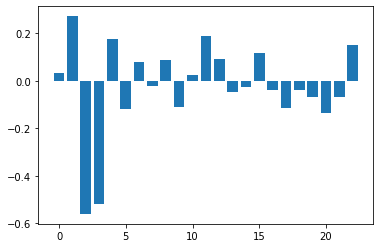

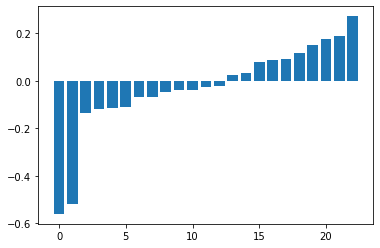

In [ ]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in sorted((enumerate(importance)), key = lambda x: x[1]):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
# plot sorted feature importance
pyplot.bar([x for x in range(len(importance))], sorted(importance))
pyplot.show()

#### select feature 2,3,4,11,1

In [ ]:
X_fs = X[:, [2, 3, 4, 11, 1]]
X_fs.shape

(2485, 5)

### redefine model 63.54% (1.58%) 2min 59s

In [ ]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(30, input_shape=(5,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', 
               metrics=['accuracy'])
	return model

In [ ]:
# evaluate smaller model with standardised dataset
%%time
with tf.device('GPU'):
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(model=create_baseline, 
                                              epochs=70, batch_size=7, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    results = cross_val_score(pipeline, X_fs, y, cv=kfold)
print("accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smaller: 63.54% (1.58%)
CPU times: user 3min 12s, sys: 13.4 s, total: 3min 26s
Wall time: 2min 59s


### smaller model 63.18% (1.57%) 3min 10s 
50 epoch 62.74% (1.13%) 2min 35s 

In [ ]:
# baseline model
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(15, input_shape=(5,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', 
               metrics=['accuracy'])
	return model

In [ ]:
# evaluate smaller model with standardised dataset
%%time
with tf.device('GPU'):
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(model=create_smaller, 
                                              epochs=70, batch_size=7, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    results = cross_val_score(pipeline, X_fs, y, cv=kfold)
print("accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

accuracy: 63.18% (1.57%)
CPU times: user 3min 13s, sys: 13.2 s, total: 3min 26s
Wall time: 3min 10s


### bigger model 63.50% (2.71%) 3min 16s

In [ ]:
# larger model
def create_bigger():
	# create model
	model = Sequential()
	model.add(Dense(30, input_shape=(5,), activation='relu'))
	model.add(Dense(15, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', 
	              metrics=['accuracy'])
	return model

In [ ]:
# evaluate smaller model with standardised dataset
%%time
with tf.device('GPU'):
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(model=create_bigger, 
                                              epochs=70, batch_size=7, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    results = cross_val_score(pipeline, X_fs, y, cv=kfold)
print("accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

accuracy: 63.50% (2.71%)
CPU times: user 3min 21s, sys: 13.6 s, total: 3min 34s
Wall time: 3min 16s


## prediction

In [ ]:
model.predict_proba(X_std)

array([[0.36, 0.64],
       [0.85, 0.15],
       [0.38, 0.62],
       ...,
       [0.37, 0.63],
       [0.53, 0.47],
       [0.28, 0.72]])

# Bottom of this document